http://web.mit.edu/kirtley/kirtley/binlustuff/literature/control/Kalman%20filter.pdf

* The filter is a MSE minimizer
* $y_k = a_k x_k + n_k$
* $y_k$ is the observed signal
* $a_k$ is the gain term
* $x_k$ is the information bearing signal

### MLE formulation
* $max[P(y|x)]$ is the objective
* $P(y|x) = K_k exp (-\frac{(y_k - a_k x_k)^2}{2 \sigma_k^2})$
* $log P(y|x) = -\frac{1}{2} \Sigma_k (\frac{(y_k - a_k x_k)^2}{\sigma_k^2}) $

### Kalman filter - State Space Derivation
* $x_{k+1} = \Phi x_k + w_k$
    * $x_k$ is nx1
    * $\Phi$ is a transition matrix of $mxn$
    * $w_k$ is noise
    * x is the state vector 
* $z_{k+1} = H x_k + v_k$
    * $z_k$ is the actual measurement of x at time k, (mx1)
    * H is the noiseless connection between the state vector and the measurement vector (mxn)
    * $v_kk$ is the associated measurement error
* $E[e_k e_k^T] = P_k$
    * $P_k$ is nxn
    * $P_k = E[e_k e_k^T] = E[(x_k - \hat{x_k})(x_k - \hat{x_k})^T]$
* $\hat{x}_k = \hat{x}_k^{'} + K_k (z_k - H \hat{x}_k^{'}) $
    * $\hat{x}_k^{'}$ - the prior estimate
    * $K_k$ is the Kalman gain
    * $z_k - H \hat{x}_k^{'}$ is the measurement residual
    * $\hat{x}_k = \hat{x}_k^{'} + K_k (H x_k + v_k - H \hat{x}_k^{'}) $
    * interpretation: estimate of x = prior estimate + scaling * residual
* with a lot of math, we come up with the kalman gain $K_k$
* prediction is $\hat{x}_{k+1}^{'} = \Phi \hat{x}_k$

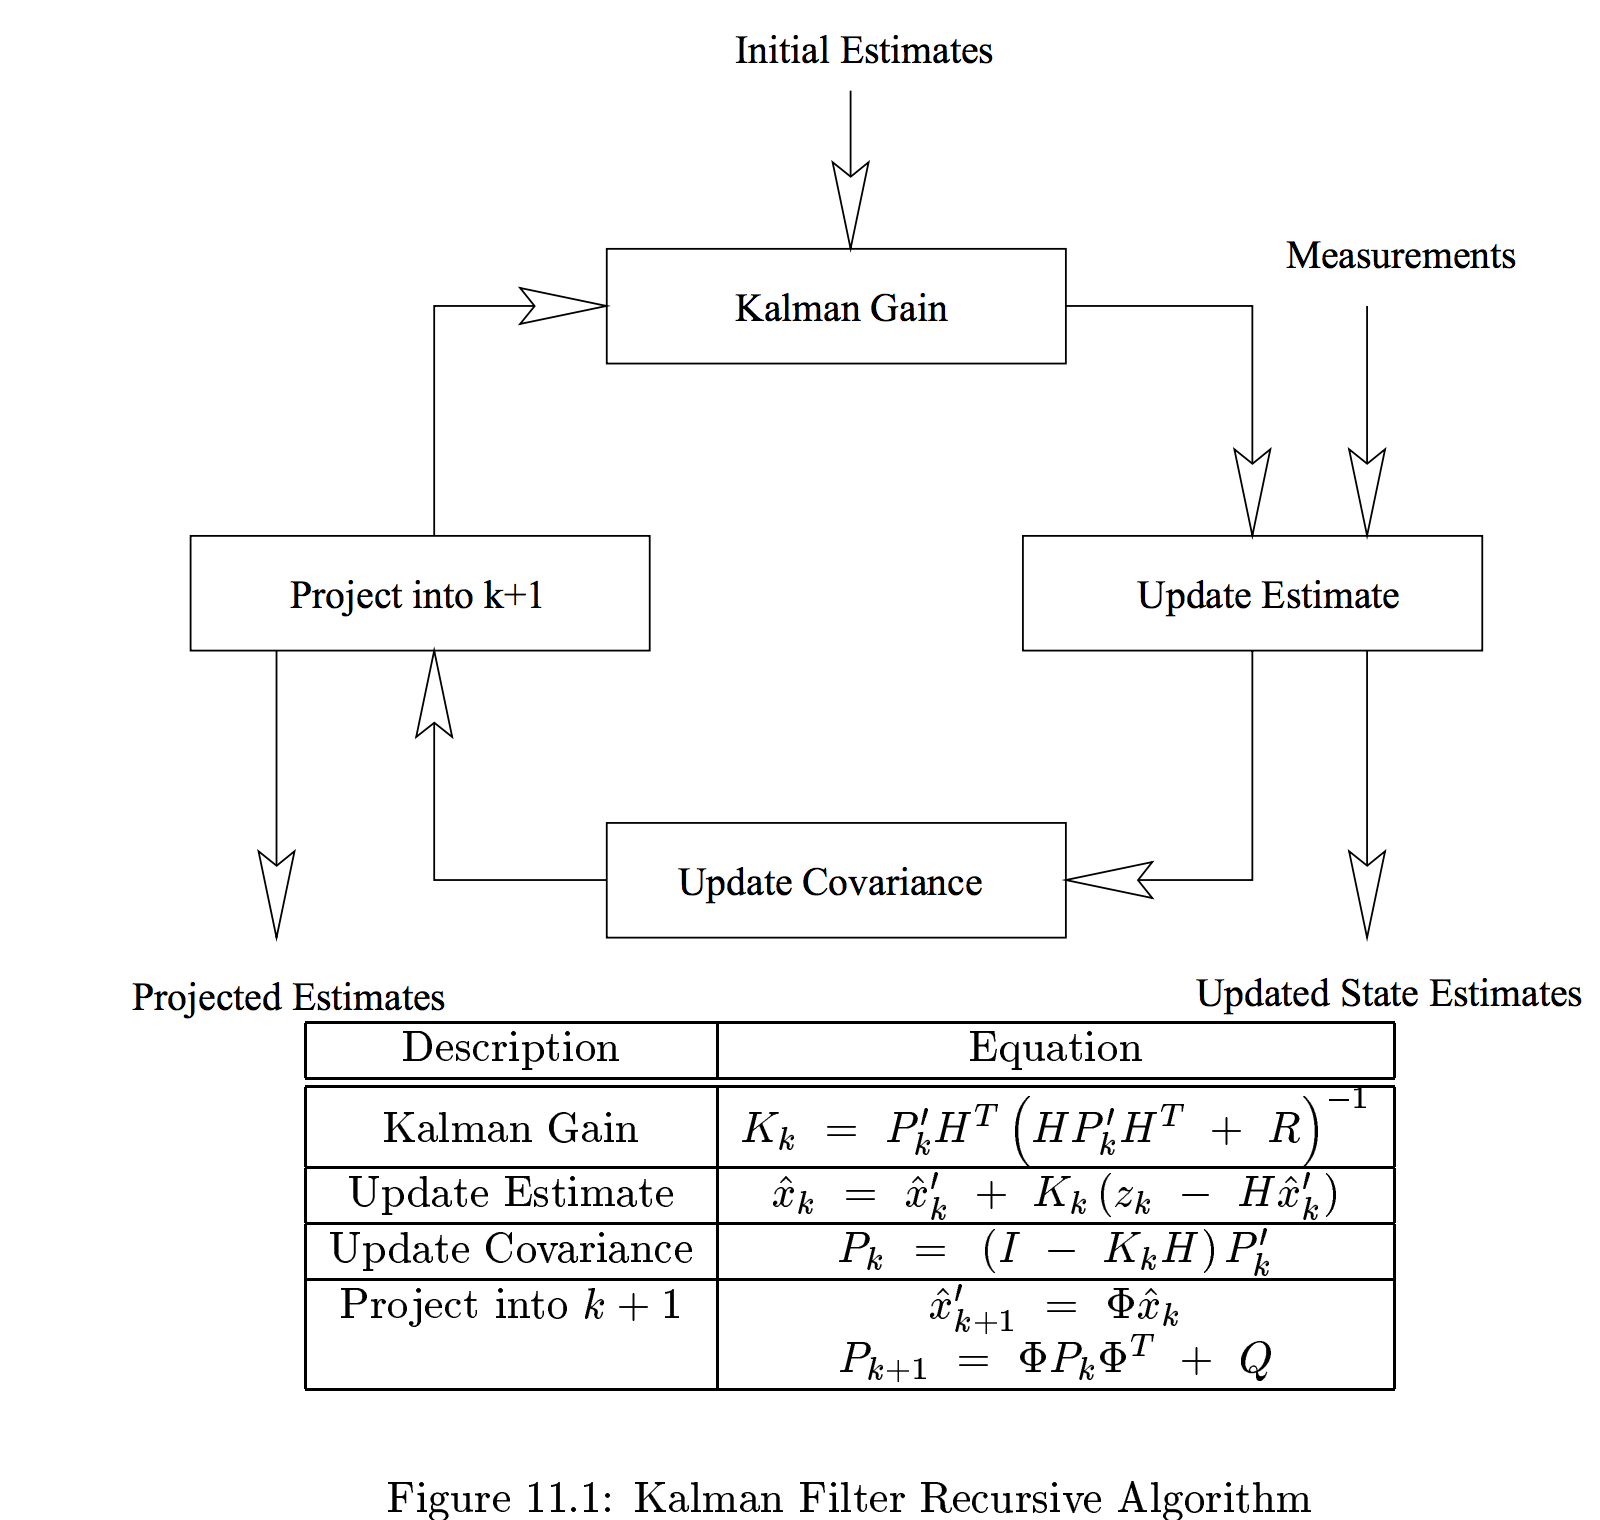

In [2]:
from IPython.display import Image
Image(filename='kalman_diagram.png') 

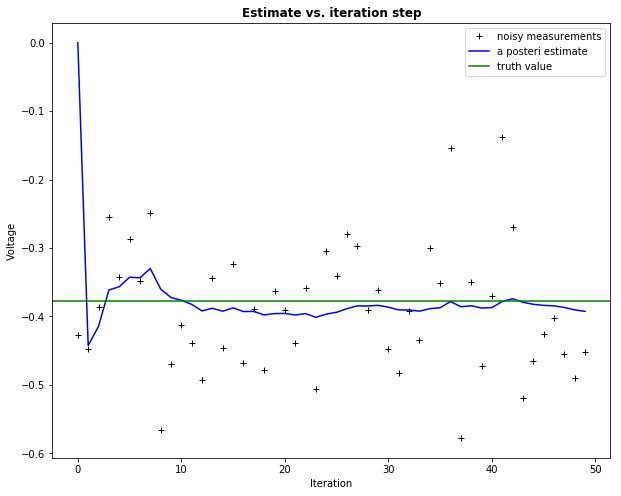

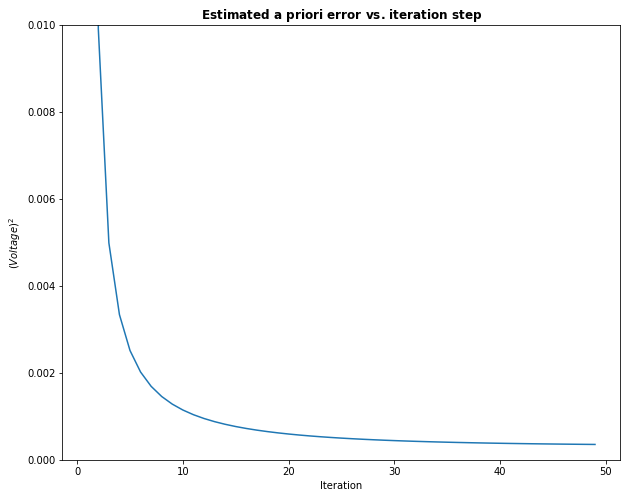

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 8)

# intial parameters
n_iter = 50
sz = (n_iter,) # size of array
x = -0.37727 # truth value (typo in example at top of p. 13 calls this z)
z = np.random.normal(x,0.1,size=sz) # observations (normal about x, sigma=0.1)

Q = 1e-5 # process variance

# allocate space for arrays
xhat=np.zeros(sz)      # a posteri estimate of x
P=np.zeros(sz)         # a posteri error estimate
xhatminus=np.zeros(sz) # a priori estimate of x
Pminus=np.zeros(sz)    # a priori error estimate
K=np.zeros(sz)         # gain or blending factor

R = 0.1**2 # estimate of measurement variance, change to see effect

# intial guesses
xhat[0] = 0.0
P[0] = 1.0

for k in range(1,n_iter):
    # time update
    xhatminus[k] = xhat[k-1]
    Pminus[k] = P[k-1]+Q

    # measurement update
    K[k] = Pminus[k]/( Pminus[k]+R )
    xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k])
    P[k] = (1-K[k])*Pminus[k]

plt.figure()
plt.plot(z,'k+',label='noisy measurements')
plt.plot(xhat,'b-',label='a posteri estimate')
plt.axhline(x,color='g',label='truth value')
plt.legend()
plt.title('Estimate vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('Voltage')

plt.figure()
valid_iter = range(1,n_iter) # Pminus not valid at step 0
plt.plot(valid_iter,Pminus[valid_iter],label='a priori error estimate')
plt.title('Estimated $\it{\mathbf{a \ priori}}$ error vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('$(Voltage)^2$')
plt.setp(plt.gca(),'ylim',[0,.01])
plt.show()